## 자연언어처리(NLP:Natural Language Processing.)
- nltk
- konlpy

In [5]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [6]:
kkma.sentences('한국어 분석을 시작합니다. 재미있어요~~')

['한국어 분석을 시작합니다.', '재미있어요~~']

In [7]:
kkma.nouns('한국어 분석을 시작합니다. 재미있어요~~')

['한국어', '분석']

In [8]:
kkma.pos('한국어 분석을 시작합니다. 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [9]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [11]:
hannanum.nouns('한국어 분석을 시작합니다. 재미있어요~~')

['한국어', '분석', '시작']

In [12]:
hannanum.morphs('한국어 분석을 시작합니다. 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '.', '재미있', '어요', '~~']

In [13]:
hannanum.pos('한국어 분석을 시작합니다. 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('.', 'S'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [14]:
from konlpy.tag import Twitter
t = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [15]:
t.nouns('한국어 분석을 시작합니다. 재미있어요~~')

['한국어', '분석', '시작']

In [16]:
# 형태소
t.morphs('한국어 분석을 시작합니다. 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '.', '재미있어요', '~~']

In [17]:
# 형태소 분석
t.pos('한국어 분석을 시작합니다. 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('.', 'Punctuation'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 워드 클라우드

In [47]:
# pip install WordCloud , Pillow
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
# STOPWORDS 는 지워야 하는 부분을 지우기 위한 package
# PIL은 영상 이미지 처리 할 경우 사용하는 package
import matplotlib.pyplot as plt

In [48]:
text = open('09. alice.txt').read()
# print(text)
alice = Image.open('09. alice_mask.png')
alice_mask = np.array(alice) # numpy 로 alice 이미지를 표현
# alice_mask

stopwords = set(STOPWORDS) # 이미 존재하는 단어도 있음
stopwords.add("said") # 추출하지 않을 단어를 선택
# stopwords

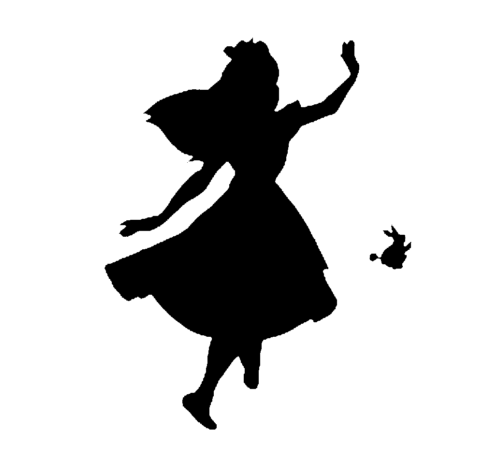

In [49]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, # cmap=plt.cm.gray 로 흑백 사진으로 변경
           interpolation = 'bilinear')   # interpolation = 'bilinear' 라인을 부드럽게 만든다.
plt.axis('off') #  x , y 축을 지움
plt.show()

In [58]:
wc = WordCloud(background_color = 'white',
                max_words = 1000, # 최대 단어 2000개
                mask = alice_mask, stopwords = stopwords)
wc = wc.generate(text)
# wc.words_
wc

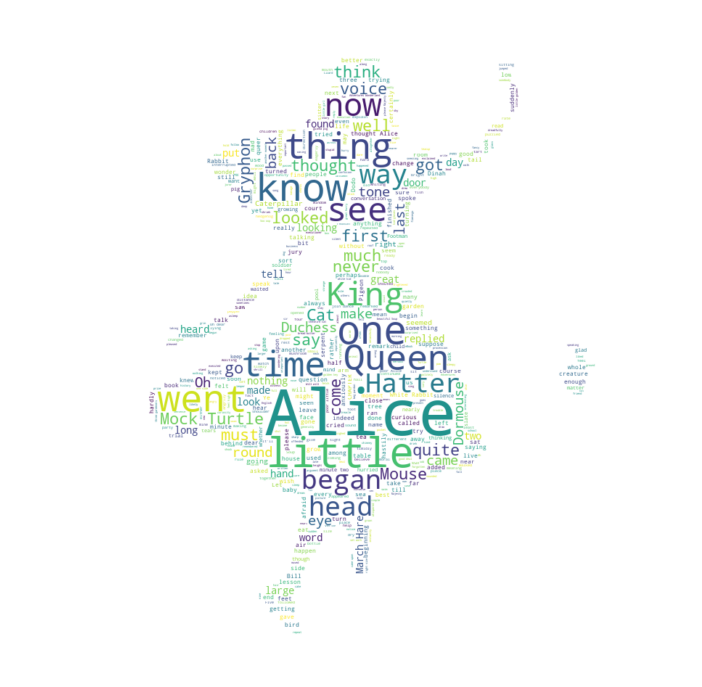

In [59]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 문장의 이해와 유사도 측정

In [61]:
from nltk.tokenize import word_tokenize
import nltk

In [81]:
train = [('i like you','pos'),  # pos 는 긍정적(positive)이라는 뜻
         ('i hate you', 'neg'), # neg 는 부정적(negative)
         ('you like me','neg'),
         ('i like her', 'pos')] 

In [82]:
# nltk.download('punkt') # word_tokenize() 오류시 미리 실행 후 주석처리

all_words = set(word.lower() for sentence in train 
                for word in word_tokenize(sentence[0])) # word.lower() 소문자 # tokenize 문장을 분리

all_words # 단어 분리, set = 집합
# {'hate', 'her', 'i', 'like', 'me', 'you'} 말뭉치


# for sentence in train:
# #    print(sentence)
#     for words in word_tokenize(sentence[0]):
#         print(words)
        

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [84]:
# 'i like you'
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) # x[0] : 문장
                                                        for x in train]  # x[1] : pos/neg
t


[({'her': False,
   'me': False,
   'hate': False,
   'i': True,
   'you': True,
   'like': True},
  'pos'),
 ({'her': False,
   'me': False,
   'hate': True,
   'i': True,
   'you': True,
   'like': False},
  'neg'),
 ({'her': False,
   'me': True,
   'hate': False,
   'i': False,
   'you': True,
   'like': True},
  'neg'),
 ({'her': True,
   'me': False,
   'hate': False,
   'i': True,
   'you': False,
   'like': True},
  'pos')]

In [87]:
# Naive bayes classify : 문장을 학습
classifier = nltk.NaiveBayesClassifier.train(t) # t를 가지고 학습
classifier.show_most_informative_features()

# her 이라는 단어가 없으면 neg 가 1.7, postive 1.0


Most Informative Features
                    like = True              pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0


In [95]:
# test data 사용
# test_sentence = 'i like jane' 'pos'
# test_sentence = 'i hate you' 'neg'
test_sentence = 'they love you' 'neg'
test_sent_features = {word.lower():(word in word_tokenize(test_sentence.lower()))
                     for word in all_words} # 소문자를 뽑음

test_sent_features

{'her': False,
 'me': False,
 'hate': False,
 'i': False,
 'you': False,
 'like': False}

In [96]:
classifier.classify(test_sent_features)

'neg'

### 문장의 이해 : 한글

In [112]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

In [113]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]


In [114]:
all_words = set(word.lower() for sentence in train 
                for word in word_tokenize(sentence[0]))
# all_words # 단어별 정리

In [115]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) # x[0] : 문장
                                                        for x in train]  # x[1] : pos/neg
# t

In [116]:
# Naive bayes classify : 문장을 학습
classifier = nltk.NaiveBayesClassifier.train(t) # t를 가지고 학습
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0


In [117]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

test_sent_features = {word.lower():(word in word_tokenize(test_sentence.lower()))
                     for word in all_words}

# test_sent_features

In [118]:
classifier.classify(test_sent_features)
# 'neg'    : 영어 단어 방식의 학습을 사용하였기 때문에 결과는 실패

'neg'

In [119]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [139]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs
# row = train[0]     # ('메리가 좋아', 'pos')
# row[0]             # '메리가 좋아'
# row[1]             # 'pos'
# t = pos_tagger.pos(row[0])   # ['메리/Noun', '가/Josa', '좋다/Adjective']  'tokenize(row[0])'과 같다.
# '/'.join(t[0])               # '메리/Noun'
# '/'.join(t[1])               # '가/Josa'
# [(tokenize(row[0]),row[1])]

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [140]:
tokens = [t for d in train_docs for t in d[0]]
tokens # set (집합) 으로 바꾸면 중복이 제거된다.

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [147]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

train_xy = [(term_exists(d),c) for d,c in train_docs]
# train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [148]:
# Naive bayes classify : 문장을 학습
classifier = nltk.NaiveBayesClassifier.train(train_xy) # t를 가지고 학습
classifier.show_most_informative_features()

Most Informative Features
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                  난/Noun = True              neg : pos    =      2.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                 마치/Noun = False             neg : pos    =      1.1 : 1.0
           이쁘다/Adjective = False             neg : pos    =      1.1 : 1.0


In [149]:
test_sentence = [('난 수업이 마치면 메리랑 놀거야')]
test_docs = pos_tagger.pos(test_sentence[0])
test_sentence_features = { word: (word in tokens) for word in test_docs}
test_sentence_features


{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [150]:
classifier.classify(test_sent_features)

'pos'

### 문장의 유사도 측정

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1)

In [164]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떡하죠?',
            '메리는 공원에서 산책하고 노는 것을 싫어해요',
            '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
            '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [165]:
X = vectorizer.fit_transform(contents)
X_t = X.toarray().transpose()
print(X_t.shape) # (22, 4) 문장이 4개, 4개의 문장에서 22개의 
print(X_t)
vectorizer.get_feature_names() # 22개의 단어가 존재
# vector의 좌표가 똑같으면 비슷한 것으로 간주한다.

# 첫번째 컬럼은 첫번째 문장을 뜻하고
# 행은 문장의 구성이 'vectorizer.get_feature_names()'의 어디에 위치했는지 알려준다.
# 예를 들어 '메리랑'이라는 단어는 첫번째 문장(column 1)에 있고 'vectorizer.get_feature_names()'의 11번째에 존재하기 때문에
# 1열 11행의 값은 1이 된다.

(22, 4)
[[0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]]


['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '여행을',
 '이상해요',
 '있어요']

In [169]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
print(new_post_vec.toarray())
# [[0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]]


[[0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]]


In [176]:
# 계산
import scipy as sp
def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [177]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
# print(num_samples, num_features) # 4, 22

best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
# dist의 값이 작을수록 유사함(dist는 본래 문장과의 거리를 의미)

4 22
== Post 0 with dist=2.45   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=2.24   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.65   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
